Problem Statement:
A digital arm of a bank faces challenges with lead conversions. The primary objective of this division is to increase customer acquisition through digital channels. The division was set up a few years back and the primary focus of the division over these years has been to increase the number of leads getting into the conversion funnel.

They source leads through various channels like search, display, email campaigns and via affiliate partners. As expected, they see differential conversion depending on the sources and the quality of these leads.

They now want to identify the leads' segments having a higher conversion ratio (lead to buying a product) so that they can specifically target these potential customers through additional channels and re-marketing. They have provided a partial data set for salaried customers from the last 3 months. They also capture basic details about customers. We need to identify the segment of customers with a high probability of conversion in the next 30 days.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
import io
%cd "C:\Mani-DS\Sales Excellence"

C:\Mani-DS\Sales Excellence


In [3]:
sales_train=pd.read_csv("train.csv")
sales_test=pd.read_csv("test.csv")

# Exploring the Data

In [4]:
print(sales_test.info())
print(sales_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30037 entries, 0 to 30036
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   30037 non-null  object 
 1   Gender                               30037 non-null  object 
 2   DOB                                  30034 non-null  object 
 3   Lead_Creation_Date                   30037 non-null  object 
 4   City_Code                            29723 non-null  object 
 5   City_Category                        29723 non-null  object 
 6   Employer_Code                        28432 non-null  object 
 7   Employer_Category1                   28432 non-null  object 
 8   Employer_Category2                   28342 non-null  float64
 9   Monthly_Income                       30037 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  26000 non-null  object 
 11  Primary_Bank_Type           

In [5]:
print(sales_test.shape)
print(sales_train.shape)

(30037, 21)
(69713, 22)


In [6]:
sales_test.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Primary_Bank_Type,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
0,APPA70109647212,Male,03/06/88,05/07/16,C10028,C,COM0002222,A,4.0,2150.0,...,P,Y,S122,B,0.0,10000.0,3.0,20.0,372.0,4
1,APPB10687939341,Male,13/07/81,01/07/16,C10003,A,COM0001784,C,4.0,4200.0,...,P,Y,S133,C,0.0,69000.0,5.0,24.0,1985.0,7
2,APPC80449411414,Female,19/11/90,01/07/16,C10009,B,COM0045260,B,4.0,1000.0,...,P,N,S133,B,0.0,NaN,NaN,NaN,NaN,0
3,APPD30665094501,Female,15/10/92,01/07/16,C10005,A,COM0000085,A,3.0,1465.0,...,P,N,S133,C,0.0,NaN,NaN,NaN,NaN,0
4,APPE80379821637,Male,21/09/88,01/07/16,C10005,A,COM0006422,A,4.0,2340.0,...,P,Y,S143,B,500.0,10000.0,2.0,NaN,NaN,0


In [7]:
sales_train.head()

,ID,Gender,DOB,Lead_Creation_Date,City_Code,City_Category,Employer_Code,Employer_Category1,Employer_Category2,Monthly_Income,...,Contacted,Source,Source_Category,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
0,APPC90493171225,Female,23/07/79,15/07/16,C10001,A,COM0044082,A,4.0,2000.0,...,N,S122,G,0.0,NaN,NaN,NaN,NaN,0,0
1,APPD40611263344,Male,07/12/86,04/07/16,C10003,A,COM0000002,C,1.0,3500.0,...,Y,S122,G,0.0,20000.0,2.0,13.25,953.0,10,0
2,APPE70289249423,Male,10/12/82,19/07/16,C10125,C,COM0005267,C,4.0,2250.0,...,Y,S143,B,0.0,45000.0,4.0,NaN,NaN,0,0
3,APPF80273865537,Male,30/01/89,09/07/16,C10477,C,COM0004143,A,4.0,3500.0,...,Y,S143,B,0.0,92000.0,5.0,NaN,NaN,7,0
4,APPG60994436641,Male,19/04/85,20/07/16,C10002,A,COM0001781,A,4.0,10000.0,...,Y,S134,B,2500.0,50000.0,2.0,NaN,NaN,10,0


In [8]:
sales_test.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1
count,28342.000000,3.003700e+04,30005.000000,18166.000000,18166.000000,9652.000000,9652.000000,30037.000000
mean,3.728248,3.977139e+03,348.909060,39482.990201,3.903116,19.280537,1094.914836,3.962313
std,0.794883,2.328960e+04,1000.816847,30527.865594,1.150820,5.882246,727.452303,3.821020
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,625.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,946.000000,2.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1291.000000,7.000000
max,4.000000,3.500000e+06,43000.000000,300000.000000,6.000000,37.000000,6979.000000,10.000000


In [9]:
sales_train.describe()

,Employer_Category2,Monthly_Income,Existing_EMI,Loan_Amount,Loan_Period,Interest_Rate,EMI,Var1,Approved
count,65415.000000,6.971300e+04,69662.000000,42004.000000,42004.000000,22276.000000,22276.000000,69713.000000,69713.000000
mean,3.720187,5.622283e+03,360.928751,39429.982859,3.890629,19.213570,1101.466242,3.948446,0.014631
std,0.807374,1.747671e+05,2288.517927,30727.595990,1.167491,5.847136,752.661394,3.819214,0.120073
min,1.000000,0.000000e+00,0.000000,5000.000000,1.000000,11.990000,118.000000,0.000000,0.000000
25%,4.000000,1.650000e+03,0.000000,20000.000000,3.000000,15.250000,649.000000,0.000000,0.000000
50%,4.000000,2.500000e+03,0.000000,30000.000000,4.000000,18.000000,941.000000,2.000000,0.000000
75%,4.000000,4.000000e+03,350.000000,50000.000000,5.000000,20.000000,1295.000000,7.000000,0.000000
max,4.000000,3.838384e+07,545436.500000,300000.000000,6.000000,37.000000,13556.000000,10.000000,1.000000


In [10]:
print(sales_test.columns)

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1'],
      dtype='object')


In [11]:
print(sales_train.columns)

Index(['ID', 'Gender', 'DOB', 'Lead_Creation_Date', 'City_Code',
       'City_Category', 'Employer_Code', 'Employer_Category1',
       'Employer_Category2', 'Monthly_Income',
       'Customer_Existing_Primary_Bank_Code', 'Primary_Bank_Type', 'Contacted',
       'Source', 'Source_Category', 'Existing_EMI', 'Loan_Amount',
       'Loan_Period', 'Interest_Rate', 'EMI', 'Var1', 'Approved'],
      dtype='object')


# Exploratory Data Analysis

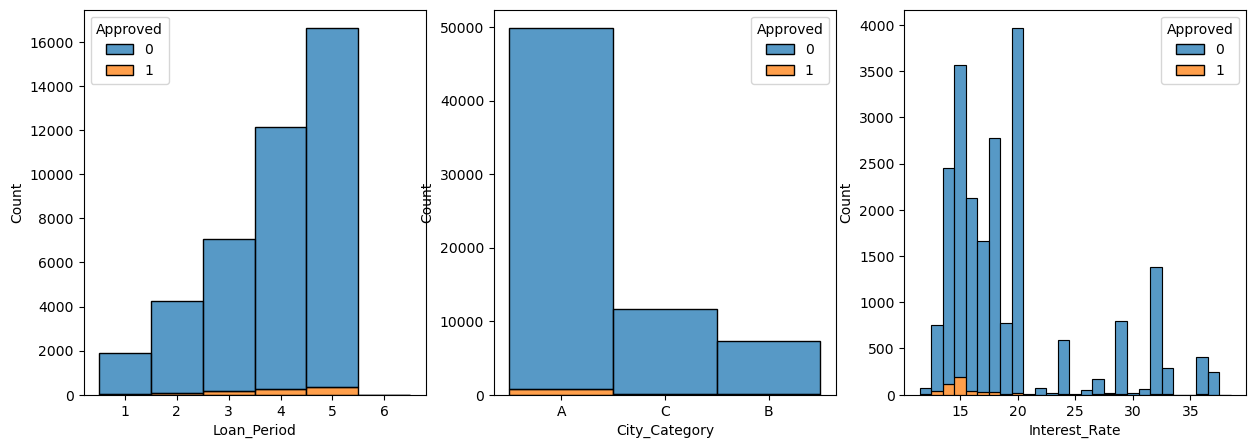

In [12]:
d1=sales_train.melt(id_vars="Approved")
data1=sales_train[['Loan_Period','City_Category','Interest_Rate']]
fig , ax=plt.subplots(nrows = 1, ncols = 3, figsize=(15,5))
for variable, subplot in zip(data1, ax.flatten()):
        sns.histplot(x=sales_train[variable],data=d1, ax = subplot,hue=sales_train.Approved,discrete=True, multiple='stack')
plt.show()

Observations:
* MAXIMUM NUMBERS OF LOAN WERE TAKEN OPTING 5 YEARS AS THE LOAN PERIOD AND THEN FOLLOWED BY 4 & 3 YEARS
* PEOPLE FROM A CATEGORY CITY ARE MAJORLY OPTING FOR LOANS WHERE B CATEGORY CITY PEOPLE ARE OPTING LESS NUMBER OF LOANS
* LOANS WITH 20% INTREST RATE ARE MAJORLY BEING APPLIED WHERE LOANS WITH 15% INTREST RATE ARE BEING MAJORLY APPROVED

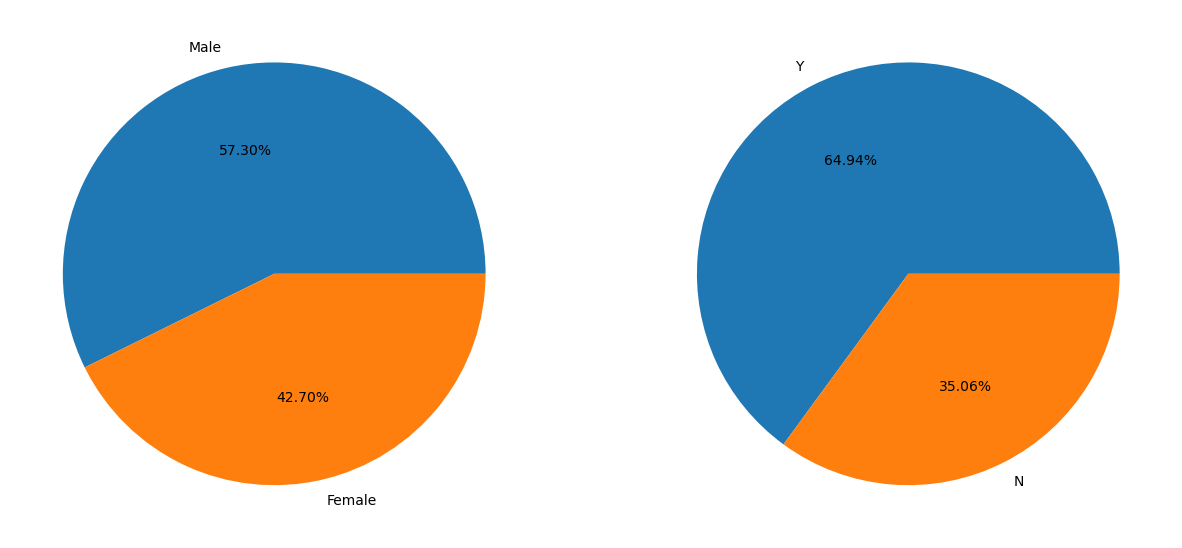

In [13]:
data1=sales_train.Gender.value_counts()
data2=sales_train.Contacted.value_counts()
fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(15,15))
ax1.pie(data1,autopct="%1.2f%%",labels=data1.index)
ax2.pie(data2,autopct="%1.2f%%",labels=data2.index)
plt.show()

In [14]:
sales_test["Approved"]="test"

In [15]:
combined_sales=pd.concat([sales_train,sales_test],axis=0)

In [16]:
combined_sales.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 30036
Data columns (total 22 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   99750 non-null  object 
 1   Gender                               99750 non-null  object 
 2   DOB                                  99732 non-null  object 
 3   Lead_Creation_Date                   99750 non-null  object 
 4   City_Code                            98622 non-null  object 
 5   City_Category                        98622 non-null  object 
 6   Employer_Code                        94127 non-null  object 
 7   Employer_Category1                   94127 non-null  object 
 8   Employer_Category2                   93757 non-null  float64
 9   Monthly_Income                       99750 non-null  float64
 10  Customer_Existing_Primary_Bank_Code  86322 non-null  object 
 11  Primary_Bank_Type           

In [17]:
# checking the missing values
combined_sales.isnull().sum().sort_values(ascending=False)

EMI                                    67822
Interest_Rate                          67822
Loan_Period                            39580
Loan_Amount                            39580
Primary_Bank_Type                      13428
Customer_Existing_Primary_Bank_Code    13428
Employer_Category2                      5993
Employer_Code                           5623
Employer_Category1                      5623
City_Code                               1128
City_Category                           1128
Existing_EMI                              83
DOB                                       18
Var1                                       0
ID                                         0
Source_Category                            0
Source                                     0
Contacted                                  0
Gender                                     0
Monthly_Income                             0
Lead_Creation_Date                         0
Approved                                   0
dtype: int

In [18]:
objectcols=combined_sales.select_dtypes(include="object")
numericcols=combined_sales.select_dtypes(include=np.number)

In [19]:
numericcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 30036
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employer_Category2  93757 non-null  float64
 1   Monthly_Income      99750 non-null  float64
 2   Existing_EMI        99667 non-null  float64
 3   Loan_Amount         60170 non-null  float64
 4   Loan_Period         60170 non-null  float64
 5   Interest_Rate       31928 non-null  float64
 6   EMI                 31928 non-null  float64
 7   Var1                99750 non-null  int64  
dtypes: float64(7), int64(1)
memory usage: 6.8 MB


In [20]:
numericcols.isnull().sum().sort_values(ascending=False)

Interest_Rate         67822
EMI                   67822
Loan_Amount           39580
Loan_Period           39580
Employer_Category2     5993
Existing_EMI             83
Monthly_Income            0
Var1                      0
dtype: int64

In [21]:
from sklearn.experimental import enable_iterative_imputer

In [22]:
from sklearn.impute import IterativeImputer

In [23]:
from sklearn.tree import DecisionTreeRegressor

In [24]:
imputer=IterativeImputer(estimator=DecisionTreeRegressor(),initial_strategy="mean",max_iter=10)

In [25]:
numericcols_impute=imputer.fit_transform(numericcols)

In [26]:
numericcols_impute=pd.DataFrame(numericcols_impute,columns=numericcols.columns)

In [27]:
numericcols_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Employer_Category2  99750 non-null  float64
 1   Monthly_Income      99750 non-null  float64
 2   Existing_EMI        99750 non-null  float64
 3   Loan_Amount         99750 non-null  float64
 4   Loan_Period         99750 non-null  float64
 5   Interest_Rate       99750 non-null  float64
 6   EMI                 99750 non-null  float64
 7   Var1                99750 non-null  float64
dtypes: float64(8)
memory usage: 6.1 MB


In [28]:
from sklearn.preprocessing import StandardScaler

In [29]:
scaler=StandardScaler()

In [30]:
numericcols_scaled=scaler.fit_transform(numericcols_impute)

In [31]:
numericcols_scaled=pd.DataFrame(numericcols_scaled,columns=numericcols_impute.columns[0:8])

In [32]:
from sklearn.preprocessing import LabelEncoder

In [33]:
numericcols["Approved"]=objectcols.Approved

In [34]:
objectcols=objectcols.drop("Approved",axis=1)

In [35]:
original=objectcols

In [36]:
mask=objectcols.isnull()

In [37]:
objectcols=objectcols.astype(str).apply(LabelEncoder().fit_transform)

In [38]:
objectcols=objectcols.where(~mask,original)

In [39]:
objectcols.isnull().sum().sort_values(ascending=False)

Customer_Existing_Primary_Bank_Code    13428
Primary_Bank_Type                      13428
Employer_Code                           5623
Employer_Category1                      5623
City_Code                               1128
City_Category                           1128
DOB                                       18
ID                                         0
Gender                                     0
Lead_Creation_Date                         0
Contacted                                  0
Source                                     0
Source_Category                            0
dtype: int64

In [40]:
objectcols.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99750 entries, 0 to 30036
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   ID                                   99750 non-null  int64 
 1   Gender                               99750 non-null  int64 
 2   DOB                                  99732 non-null  object
 3   Lead_Creation_Date                   99750 non-null  int64 
 4   City_Code                            98622 non-null  object
 5   City_Category                        98622 non-null  object
 6   Employer_Code                        94127 non-null  object
 7   Employer_Category1                   94127 non-null  object
 8   Customer_Existing_Primary_Bank_Code  86322 non-null  object
 9   Primary_Bank_Type                    86322 non-null  object
 10  Contacted                            99750 non-null  int64 
 11  Source                               9975

In [41]:
from sklearn.tree import DecisionTreeClassifier

In [42]:
imputer1=IterativeImputer(estimator=DecisionTreeClassifier(),initial_strategy="most_frequent",max_iter=10)

In [43]:
objectcols_impute=imputer.fit_transform(objectcols)

In [44]:
objectcols_impute=pd.DataFrame(objectcols_impute,columns=objectcols.columns)

In [45]:
objectcols_impute.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   99750 non-null  float64
 1   Gender                               99750 non-null  float64
 2   DOB                                  99750 non-null  float64
 3   Lead_Creation_Date                   99750 non-null  float64
 4   City_Code                            99750 non-null  float64
 5   City_Category                        99750 non-null  float64
 6   Employer_Code                        99750 non-null  float64
 7   Employer_Category1                   99750 non-null  float64
 8   Customer_Existing_Primary_Bank_Code  99750 non-null  float64
 9   Primary_Bank_Type                    99750 non-null  float64
 10  Contacted                            99750 non-null  float64
 11  Source                      

In [46]:
combined_sales_clean=pd.concat([objectcols_impute,numericcols_scaled],axis=1)

In [47]:
combined_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 21 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   ID                                   99750 non-null  float64
 1   Gender                               99750 non-null  float64
 2   DOB                                  99750 non-null  float64
 3   Lead_Creation_Date                   99750 non-null  float64
 4   City_Code                            99750 non-null  float64
 5   City_Category                        99750 non-null  float64
 6   Employer_Code                        99750 non-null  float64
 7   Employer_Category1                   99750 non-null  float64
 8   Customer_Existing_Primary_Bank_Code  99750 non-null  float64
 9   Primary_Bank_Type                    99750 non-null  float64
 10  Contacted                            99750 non-null  float64
 11  Source                      

In [48]:
combined_sales_clean=combined_sales_clean.reset_index()

In [49]:
numericcols=numericcols.reset_index()

In [50]:
combined_sales_clean["Approved"]=numericcols.Approved

In [51]:
combined_sales_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99750 entries, 0 to 99749
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                99750 non-null  int64  
 1   ID                                   99750 non-null  float64
 2   Gender                               99750 non-null  float64
 3   DOB                                  99750 non-null  float64
 4   Lead_Creation_Date                   99750 non-null  float64
 5   City_Code                            99750 non-null  float64
 6   City_Category                        99750 non-null  float64
 7   Employer_Code                        99750 non-null  float64
 8   Employer_Category1                   99750 non-null  float64
 9   Customer_Existing_Primary_Bank_Code  99750 non-null  float64
 10  Primary_Bank_Type                    99750 non-null  float64
 11  Contacted                   

In [52]:
train_clean=combined_sales_clean[combined_sales_clean.Approved!="test"]
test_clean=combined_sales_clean[combined_sales_clean.Approved=="test"]

In [53]:
train_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 69713 entries, 0 to 69712
Data columns (total 23 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   index                                69713 non-null  int64  
 1   ID                                   69713 non-null  float64
 2   Gender                               69713 non-null  float64
 3   DOB                                  69713 non-null  float64
 4   Lead_Creation_Date                   69713 non-null  float64
 5   City_Code                            69713 non-null  float64
 6   City_Category                        69713 non-null  float64
 7   Employer_Code                        69713 non-null  float64
 8   Employer_Category1                   69713 non-null  float64
 9   Customer_Existing_Primary_Bank_Code  69713 non-null  float64
 10  Primary_Bank_Type                    69713 non-null  float64
 11  Contacted                   

In [54]:
train_clean=train_clean.drop(["index","ID","DOB"],axis=1)

In [55]:
# split data for model building
y=train_clean.Approved
X=train_clean.drop("Approved",axis=1)

In [56]:
y=y.astype("int64")

In [57]:
y.value_counts()

0    68693
1     1020
Name: Approved, dtype: int64

<AxesSubplot: >

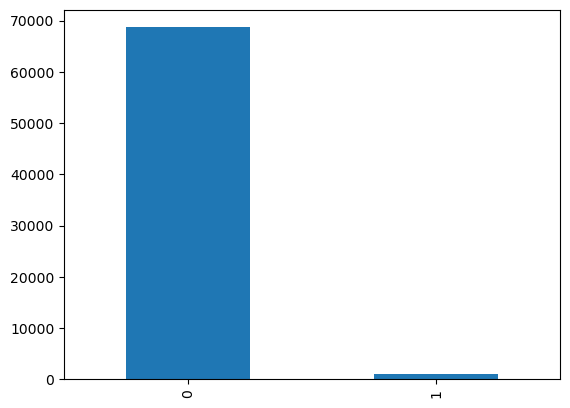

In [58]:
y.value_counts().plot(kind="bar") # imbalance data

# Balancing the Imbalance data using Smote

In [59]:
from imblearn.over_sampling import SMOTE

In [60]:
smote = SMOTE(random_state=60)

In [61]:
X_smote,y_smote = smote.fit_resample(X,y)

In [62]:
y_smote.value_counts()

0    68693
1    68693
Name: Approved, dtype: int64

# * Logistic Regression

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score

In [65]:
logit=LogisticRegression(max_iter=3000)

In [67]:
logitmodel=logit.fit(X_smote,y_smote)

In [68]:
logitmodel.score(X_smote,y_smote)

0.7435619349860976

In [69]:
logitpredict=logitmodel.predict(X_smote)

In [70]:
print(classification_report(y_smote,logitpredict))

              precision    recall  f1-score   support

           0       0.77      0.69      0.73     68693
           1       0.72      0.79      0.76     68693

    accuracy                           0.74    137386
   macro avg       0.75      0.74      0.74    137386
weighted avg       0.75      0.74      0.74    137386



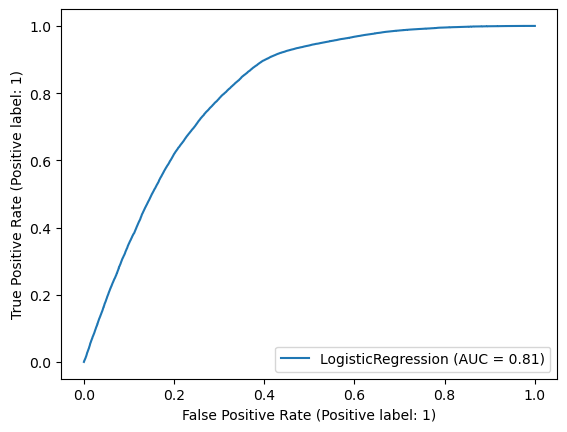

In [71]:
RocCurveDisplay.from_estimator(logit,X_smote,y_smote)

# Decision Tree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
tree=DecisionTreeClassifier(max_depth=8)

In [74]:
treemodel=tree.fit(X_smote,y_smote)

In [75]:
treemodel.score(X_smote,y_smote) 

0.9274671363894429

In [76]:
treepredict=treemodel.predict(X_smote)

In [77]:
print(classification_report(y_smote,treepredict))

              precision    recall  f1-score   support

           0       0.94      0.91      0.93     68693
           1       0.91      0.94      0.93     68693

    accuracy                           0.93    137386
   macro avg       0.93      0.93      0.93    137386
weighted avg       0.93      0.93      0.93    137386



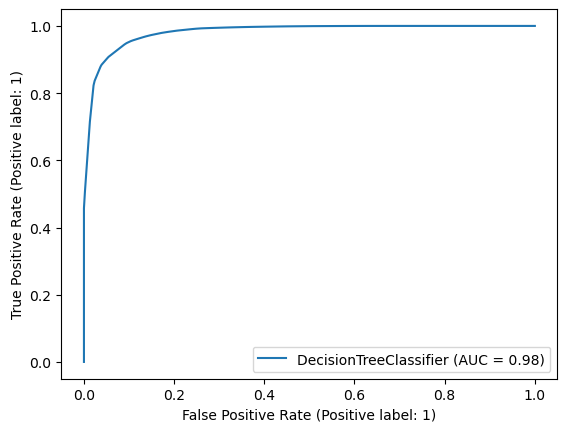

In [78]:
RocCurveDisplay.from_estimator(tree,X_smote,y_smote)

# Random Forest Classification

In [80]:
from sklearn.ensemble import RandomForestClassifier

In [81]:
RFsmote = RandomForestClassifier(n_estimators=7,max_depth=12)

In [82]:
RFmodel_smote = RFsmote.fit(X_smote,y_smote)

In [83]:
RFmodel_smote.score(X_smote,y_smote)

0.9786586697334517

In [85]:
RFsmote_predict = RFmodel_smote.predict(X_smote)

In [88]:
print(classification_report(y_smote,RFsmote_predict))

              precision    recall  f1-score   support

           0       0.98      0.97      0.98     68693
           1       0.97      0.98      0.98     68693

    accuracy                           0.98    137386
   macro avg       0.98      0.98      0.98    137386
weighted avg       0.98      0.98      0.98    137386



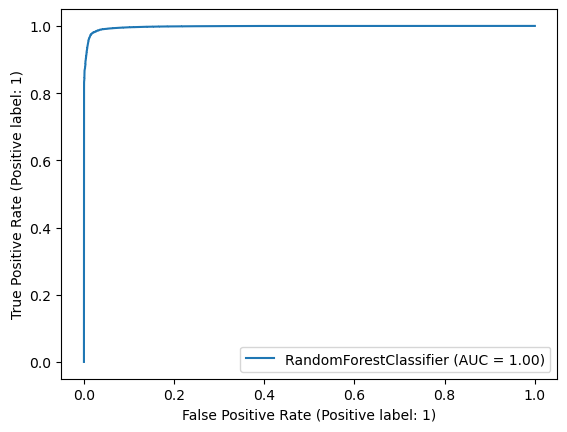

In [89]:
RocCurveDisplay.from_estimator(RFsmote,X_smote,y_smote)